# Clustering durch Varianzminimierung
Implementieren Sie den Algorithmus *Clustering durch Varianzminimierung* innerhalb des jupyter-Notebooks. Nutzen Sie dafür das gegebene Grundgerüst und beachten Sie die folgenden Anforderungen:
- Die initiale Clusterung soll auf folgende Art geschehen: Die ersten $k$ Elemente des Datensatzes werden auf die $k$ Cluster verteilt.
Die restlichen Datenpunkte sollen zufällig den Clustern zugeordnet werden. Dann werden die initialen Zentroide berechnet.
- Als Distanzfunktion nutzen Sie bitte die Manhattan-Distanz.
- In jedem Iterationsschritt soll der Algorithmus über alle Instanzen gehen und jede Instanz dem nächsten Centroid zuweisen. Nachdem alle Instanzen zugeordnet wurden, sollen die Zentroide neu berechnet werden.
- Es gibt zwei Abbruchbedingungen:
    1. Eine maximale Anzahl von Iterationen darf nicht überschritten werden.
    2. Unterschreitet die Änderung des Wertes
        $${TD}^2(\mathcal{C}) := \sum_{i=1}^{k}{{TD}^2(C_i)} \quad\text{mit}\quad {TD}^2(C_i) = \sum_{p \in C_i}{{dist}^2(p, \mu_{C_i})}$$
    zwischen zwei Iterationen ein gegebenes Minimum, dann wird keine neue Iteration mehr durchgeführt.
    
  Die entsprechenden Grenzen werden als Parameter übergeben. Der Wert ${TD}^2(\mathcal{C})$ misst den Abstand aller Punkte zu ihren jeweiligen Centroiden $\mu_{C_i}$ und ist ein Maß für die Kompaktheit des Clusterings.
- Die Modellierung der Centroide erfolgt in der Klasse *Cluster* als Liste numerischer Werte.
- Die Klassen können um weitere Methoden ergänzt werden.
- Sie dürfen die Pakete numpy und random für Ihre Implementierung nutzen. Außerdem werden für die Tests die Pakete pandas und matplotlib genutzt. Verwenden Sie keine weiteren Pakete für Ihre Implementierung.
- Beim Test auf einem geeigneten Datensatz soll ein sinnvolles Clustering entstehen.
- Mit Hilfe des *print*-Kommandos werden Zwischenergebnisse jeder Clustering-Iteration sinnvoll geloggt.
- Ihr Programmcode sollte sinnvoll kommentiert sein und sinnvolle Variablennamen verwenden.
- *Hinweis*: Stellen Sie sicher, dass der Algorithmus bei jeder Ausführung ohne Fehler funktioniert. 

Überlegen Sie sich, warum das nur unter Berücksichtigung des Grundalgorithmus aus der Vorlesung auch mit den selben Parameterwerten nicht jedes mal der Fall sein muss und wie Sie dagegen vorgehen können.

- Ihre Implementierung können Sie bis zum 28.11.2022 23:59 im Moodle abgeben.
Sollten Sie Fragen zu den Aufgaben haben, wenden Sie sich bitte persönlich oder per E-Mail an [Maximilian Stubbemann](mailto:stubbemann@cs.uni-kassel.de).

## Zusatzaufgabe für 6 ECTS:
**Hinweis**: Bearbeiten Sie diese Aufgabe nur, falls Sie am Praktikum für 6 ECTS-Punkte teilnehmen, jedoch nicht, falls Sie am Praktikum für 3 ECTS-Punkte teilnehmen.

Das Ziel des folgenden Algorithmus ist es, das Clustering durch Varianzminimierung zu verbessern, indem bessere Startcluster gewählt werden. Der Algorithmus geht dabei wie folgt vor:
1. Es wird ein Datenpunkt zufällig (gleichverteilt) als erster Zentrumspunkt gewählt.
2. Für jeden Datenpunkt $x$, welcher noch kein Zentroid ist, wird $D(x)$ als die Distanz zwischen x und dem nähesten Zentrumspunkt zu $x$ berechnet.
3. Es wird ein weiterer Zentrumspunkt mit einer gewichteten Wahrscheinlickeitsverteilung gewählt, wobei der Punkt $x$ mit einer Wahrscheinlichkeit proportional zu $D(x)^2$ gewählt wird.
4. Die Schritte 2 und 3 werden wiederholt, bis $k$ Zentrumspunkte gewählt wurden.
5. Mit den $k$ Zentrumspunkte als Startpunkten wird dann ein Clustering durch Varianzminimierung durchgeführt.

Modifizieren Sie Ihren Code so, dass beim Aufruf durch einen Parameter **init** ausgewählt werden kann, ob der optimierte Initialisierungsalgorithmus verwendet werden soll.

## Tipps:
- Zum Debugging kann es hilfreich sein, sich während der Implementierung einzelne Variablenwerte ausgeben zu lassen, insbesondere wenn Sie sich nicht sicher sind, welchen Variablentypen oder Wert Ihre Variable hat oder wenn für Sie unerklärliche Fehler auftreten. Entweder verwenden Sie zur Ausgabe einfach das *print*-Kommando oder erstellen eine Zelle, in die Sie den Variablennamen als letzte Anweisung schreiben und ausführen.
- Neben dem Ausprobieren verschiedener Parameterwerte um ein besseres Verständnis für den Algorithmus zu bekommen, kann es auch sinnvoll sein, Ihre Implementierung mehrfach mit den selben Werten auszuführen.
- Sie können (müssen aber nicht) einfache numpy-Operationen verwenden. Vektoren als Methodenparameter, Rückgabewerte oder Klasseneigenschaften sollen aber als normale Python-Listen dargestellt werden, *nicht* als numpy-Arrays. Aus dem Code und bei der Vorstellung Ihrer Implementierung sollte außerdem ersichtlich sein, dass Sie selbst die Berechnungen per Hand durchführen könnten. Dies gilt insbesondere für das Distanzmaß. 
- Jeglicher Python-Code im Jupyter-Notebook wird in der Reihenfolge ausgeführt, in der die Zellen ausgeführt wurden. Alle zugewiesenen Namen (z. Bsp. für Variablen, Funktionen und Klassen) bleiben im Speicher erhalten, sofern Sie nicht überschrieben wurden. Um einen *frischen* Zustand zu erhalten, in dem noch kein Code ausgeführt wurde, gehen Sie auf *Kernel -> Restart & Clear Output*. Falls für Sie unerklärliche Fehler auftreten oder Fehler, die Sie glauben schon behoben zu haben, kann ein Kernel Restart oft Erkenntnisse liefern. In vielen Fällen greifen Sie noch auf Programmcode zu, den Sie bereits aus den Zellen gelöscht haben. Stellen Sie vor der Abgabe sicher, dass Ihr Notebook auch in der Reihenfolge der Zellen von oben nach unten ohne Fehler durchläuft (Kernel -> Restart & Run All).

# Implementierung

In [11]:
import numpy as np
import random

def manhattan_dist(x, y):
    """ Returns the manhattan distance between vectors x and y.
    A vector is represented as a list of numeric values. """
    assert(len(x) == len(y))
    
    # Ansatz: zip gibt eine List von 2 Elemente
    distance = 0
    for x_i,y_i in zip(x,y):
        distance += abs(x_i - y_i)
    return distance
   

class VarMinClusterer():
    def __init__(self, dist_fun=manhattan_dist):
        self.dist_fun = dist_fun
        self.clusters = []
    
    def cluster(self,
                X,
                k=3,
                max_iterations=20,
                min_compactness_diff=0.05,
                init=False):
        """ Cluster the given data X.
        Takes a list of samples X where each sample is a list of numeric values.
        The parameter init determines, whether the optimized initialization procedure
        shoud be used. If you are doing the task for 3 ECTS, this parameter should not
        affect your code at all."""
        
        # Basic parameter validation.
        assert(len(X) > 0)
        assert(len(X) >= k)
        assert(max_iterations > 0)
        
        self.clusters = [Cluster() for i in range(k)]
        
        #1. Aufgabe ohne Optimierung
        if init == False:
        #initial
            #1.erste k punte in jeweilige Cluster zuordnen
            for i in range(k):
                #self.clusters[i].centroid = X[i]
                self.clusters[i].elements.append(X[i])
            #2.Die restlichen Datenpunkte sollen zufällig den Clustern zugeordnet werden. 
            for i in range(k-1,len(X)):
                randomNumber = random.randint(0,k-1)
                self.clusters[randomNumber].elements.append(X[i])
            #initial Centroide berechnen
            for cluster in self.clusters:
                cluster.calculateCentroide()
        #2. Aufgabe mit Optimierung
        if init == True:
            #1. Es wird ein Datenpunkt zufällig (gleichverteilt) als erster Zentrumspunkt gewählt.
            #Centroide wird hier gespeichert nach X
            centroidList = []
            # um Punkte zu munipulieren
            XNew = X.copy()
            #Datenpunkt zufällig ausgewählt
            randomNumber = random.randint(0,len(X)-1)
            self.clusters[k-1].centroid = X[randomNumber]
            self.clusters[k-1].elements.append(X[randomNumber])
            XNew.pop(randomNumber)
            centroidList.append(X[randomNumber])
            k -= 1
            #Für jeden Datenpunkt 𝑥, welcher noch kein Zentroid ist, 
            #wird 𝐷(𝑥) als die Distanz zwischen x und dem nähesten Zentrumspunkt zu 𝑥 berechnet.
            while k != 0:
                #weight von random.choices
                distanceCentroidToPunct = []
                for i in range(len(XNew)):
                    #nähesten Zentrumspunkt zu 𝑥 zu berechnen
                    calculateClosestCentroidToPoint = []
                    for centroid in centroidList:
                        calculateClosestCentroidToPoint.append(manhattan_dist(centroid,XNew[i]))
                    distanceCentroidToPunctElementQuadrat = min(calculateClosestCentroidToPoint) **2
                    distanceCentroidToPunct.append(distanceCentroidToPunctElementQuadrat)
                #nächste Centriode auszuw#hlen: Punkt 𝑥 mit einer Wahrscheinlichkeit proportional zu 𝐷(𝑥)2  .  
                newCentriode = random.choices(XNew, weights=distanceCentroidToPunct, k=1)
                #0 wegen List geschatet,sonst kriegt man verschiedene Länge
                newCentriodeIndex = XNew.index(newCentriode[0])
                self.clusters[k-1].centroid = newCentriode[0]
                self.clusters[k-1].elements.append(newCentriode[0])
                centroidList.append(newCentriode[0])
                XNew.pop(newCentriodeIndex)
                k -= 1    
                 
            #elements in Cluster zu ordnen mit Zufall
            for i in range(len(XNew)):
                randomNumber = random.randint(0,2)
                #if the element is not the current center
                self.clusters[randomNumber].elements.append(XNew[i])
                 
        #berechen Algothmus von Vorlesung
        while max_iterations != 0 and min_compactness_diff >= 0.05:
            centroidenList = []
            #μC0 = μC;
            compactnessOldClusters = 0
            for cluster in self.clusters:
                centroidenList.append(cluster.centroid)
                #calculate compactness for the old cluster 
                compactnessOldClusters = compactnessOldClusters + cluster.compactness()
            
            for cluster in self.clusters:
             # old elements in jede Cluster leeren
                cluster.elements = []
            
            #jede Punkt eine neue Cluster zuordnen
            for point in X:
                newClusterCalculate = []
                #jede Punkte in Cluster , berechnen mal die manhattan_dist, werden der Punkte zu der Kleinste Wert geordnet.
                for centroide in centroidenList:
                    newClusterCalculate.append(manhattan_dist(point, centroide))
                minDistance = min(newClusterCalculate)
                min_index=newClusterCalculate.index(minDistance)
                self.clusters[min_index].elements.append(point)
                
            #td fuer ganze clusters berechnen
            compactnessNewClusters = 0
            for cluster in self.clusters:
                cluster.calculateCentroide()
                compactnessNewClusters = compactnessNewClusters + cluster.compactness()
                
            max_iterations -=1
            min_compactness_diff = abs(compactnessOldClusters-compactnessNewClusters)
 
        return self.clusters

class Cluster():
    def __init__(self):
        self.elements = []
        self.centroid = []
    
    def compactness(self, dist_fun=manhattan_dist):
        #Die entsprechenden Grenzen werden als Parameter übergeben. 
        sum = 0
        for x in self.elements:
          sum = sum + manhattan_dist(self.centroid,x)**2
        return sum
    
    def calculateCentroide(self,dist_fun=manhattan_dist):
        elementsNP = np.array(self.elements)
        #Mittelwert fur alle Elements
        center = np.mean(elementsNP, axis=0)
        #die nahliegendeste Punkt zu suchen
        newCenterTempList = []
        for point in self.elements:
            newCenterTempList.append(manhattan_dist(center,point))
        minDistance = min(newCenterTempList)
        min_index=newCenterTempList.index(minDistance)
        self.centroid = self.elements[min_index]
        return self.centroid


# Ausführung des Clusterings
Hier kann der implementierte Algorithmus getestet werden. Bitte an den vorhandenen Zellen nichts ändern. Sie können aber weitere Zellen mit eigenem Code hinzufügen oder andere Parameterwerte ausprobieren (die Sie in der Abgabe dann wieder auf die ursprünglichen Werte ändern).

Um den Code auszuführen, müssen die Bibliotheken *pandas*, *matplotlib* und eventuell weitere Abhängigkeiten installiert sein. Diese sind in der Anaconda-Distribution bereits enthalten.

In [12]:
# Load the iris-dataset. Remove the class-attribute.
import pandas as pd
data = pd.read_csv("iris.csv")
del data["species"]
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
def plot_clustering(clusters, x_dim=0, y_dim=3):
    """Show a scatterplot of the given clusters and contained data-points.
    Points from the same cluster will have the same color.
    """
    import matplotlib.pyplot as plt

    plt.figure()
    for cluster in clusters:
        elems = np.array(cluster.elements)
        plt.scatter(elems[:, x_dim], elems[:, y_dim])
        ctr = cluster.centroid
        plt.plot(ctr[x_dim], ctr[y_dim], "X", c="black")
    plt.show()

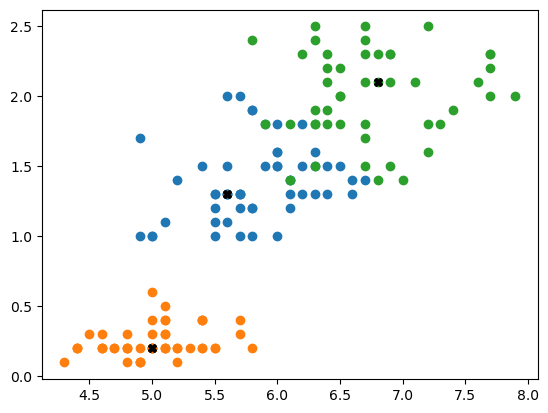

In [14]:
# Do a clustering with k=3 and plot the result with the optimized initialization routine.
# This code should run and (always) show a correct result, once the classes have been implemented.
alg = VarMinClusterer()
clusters = alg.cluster(data.values.tolist(), k=3, init=True)
plot_clustering(clusters)

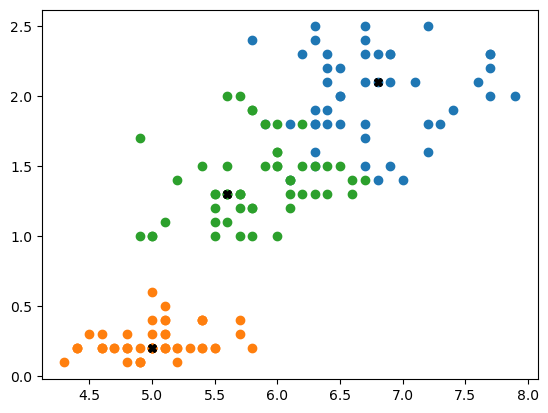

In [15]:
# Do a clustering with k=3 and plot the result.
# This code should run and (always) show a correct result, once the classes have been implemented.
alg = VarMinClusterer()
clusters = alg.cluster(data.values.tolist(), k=3, init=False)
plot_clustering(clusters)